## **`relplot`（关系图）**
### **定义**
- 是一个 **通用关系型数据绘图函数**，支持 `scatterplot`（散点图）和 `lineplot`（折线图）两种模式。
- 基于 `FacetGrid`，支持 **分面（subplots）**，适合多维数据探索。

### **核心功能**
✔ 支持 **散点图** 和 **折线图**（通过 `kind` 切换）  
✔ 分面绘制（`col`/`row` 参数）  
✔ 适合 **分类变量+连续变量** 组合  
✔ 更灵活，但需要手动指定绘图类型  

### **关键参数**
```python
sns.relplot(
    data=df,
    x="x_var",
    y="y_var",
    hue="category",   # 按颜色分组
    col="group",      # 分列绘制
    row="time",       # 分行绘制
    kind="line",      # 可选 "line" 或 "scatter"
    style="source"    # 线条/点样式
)
```

以下是 **`relplot`**、**`scatterplot`** 和 **`lineplot`** 的详细对比，涵盖功能、参数、适用场景及选择建议：

### **核心区别总结**
| 特性                | `relplot`                  | `scatterplot`            | `lineplot`              |
|---------------------|----------------------------|--------------------------|-------------------------|
| **定位**            | 通用关系图（支持分面）     | 专用散点图               | 专用折线图              |
| **绘图类型**        | 通过 `kind` 切换 (`"scatter"`/`"line"`) | 仅散点图          | 仅折线图                |
| **分面支持**        | ✔️ (通过 `col`/`row`)      | ❌                       | ❌                      |
| **置信区间**        | 需手动设置 `ci`            | ❌                       | ✔️ 默认显示             |
| **适用场景**        | 多维数据探索               | 双变量分布、相关性       | 趋势分析、时间序列      |


### **如何选择？**
- **需要简单散点图？** → **`scatterplot`**  
  - 直接、高效，无需额外参数。
  ```python
  sns.scatterplot(x="total_bill", y="tip", data=tips)
  ```
- **需要简单折线图？** → **`lineplot`**  
  - 自动计算聚合和置信区间。
  ```python
  sns.lineplot(x="year", y="passengers", data=flights)
  ```
- **需要分面或多维分析？** → **`relplot`**  
  - 支持散点图/折线图切换 + 分面。
  ```python
  sns.relplot(x="x", y="y", col="group", kind="line", data=df)
  ```
- **需要高度定制化？**  
  - `scatterplot`/`lineplot` 提供更细粒度控制（如点样式、误差带）。
  - `relplot` 适合快速探索（分面是杀手锏）。

### **性能与底层实现**
- **`scatterplot`/`lineplot`**：直接调用 matplotlib 接口，适合大数据量。
- **`relplot`**：基于 `FacetGrid`，生成多个子图时可能更耗内存。

### **总结**
| **场景**                  | **推荐函数**       |
|---------------------------|--------------------|
| 双变量散点图              | `scatterplot`      |
| 时间序列/趋势图           | `lineplot`         |
| 多维数据分面探索          | `relplot`          |
| 需同时支持散点图和折线图  | `relplot` + `kind` |

根据需求灵活选择，`relplot` 是更通用的工具，而 `scatterplot`/`lineplot` 在特定场景下更简洁高效。

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

以下代码使用Seaborn库绘制了一个多面板的折线图，主要用于展示不同条件下神经元的发放率(firing_rate)随时间(time)的变化。

,align,choice,time,coherence,firing_rate
156,dots,T1,460,12.8,57.641793
525,sacc,T1,0,12.8,68.166887
87,dots,T1,200,12.8,44.188167
236,dots,T2,60,0.0,34.719536
803,sacc,T2,160,12.8,30.136268
739,sacc,T2,-60,51.2,27.837156
238,dots,T2,60,6.4,35.400517
211,dots,T2,-40,51.2,33.091085
548,sacc,T1,80,6.4,45.232274
560,sacc,T1,120,6.4,30.867971


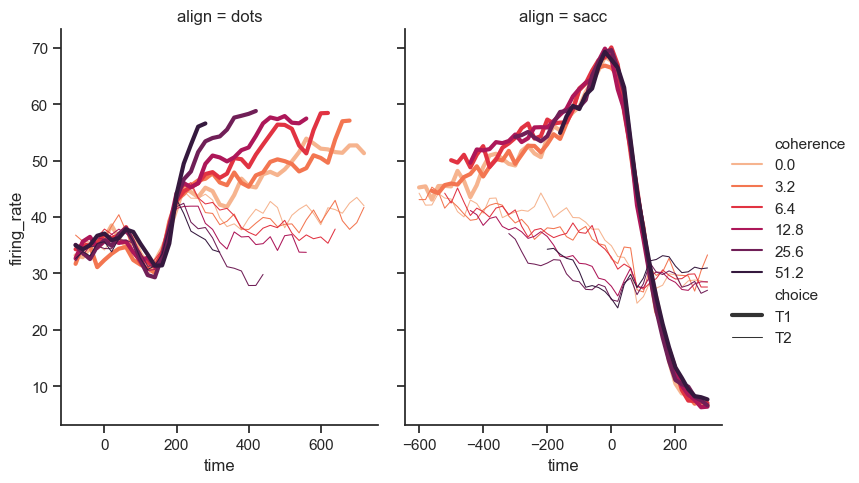

In [5]:
sns.set_theme(style="ticks")

dots = pd.read_csv("seaborn-data/dots.csv")
display(dots.sample(10))

# Define the palette as a list to specify exact values
# 创建名为"rocket_r"的颜色调色板(这是Seaborn内置的调色板，"_r"表示反向颜色顺序)
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

以下代码使用Seaborn库的relplot()函数绘制了一个关系图，展示了汽车马力(horsepower)与每加仑英里数(mpg)之间的关系，并用其他视觉元素编码了额外的变量信息。

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
153,18.0,6,250.0,105.0,3459,16.0,75,usa,chevrolet nova
340,25.8,4,156.0,92.0,2620,14.4,81,usa,dodge aries wagon (sw)
169,20.0,6,232.0,100.0,2914,16.0,75,usa,amc gremlin
77,22.0,4,121.0,76.0,2511,18.0,72,europe,volkswagen 411 (sw)
243,21.5,3,80.0,110.0,2720,13.5,77,japan,mazda rx-4
303,31.8,4,85.0,65.0,2020,19.2,79,japan,datsun 210
389,22.0,6,232.0,112.0,2835,14.7,82,usa,ford granada l
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d
154,15.0,6,250.0,72.0,3432,21.0,75,usa,mercury monarch
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra


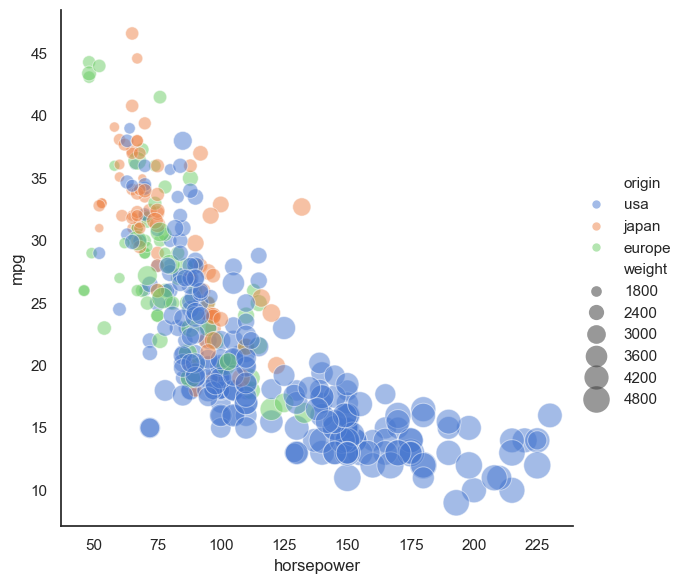

In [7]:
sns.set_theme(style="white")

# 从Seaborn的内置数据集中加载mpg数据集（汽车数据集）。
# 数据集内容：
#     mpg：每加仑英里数（燃油效率，目标变量）
#     horsepower：马力（发动机功率，x轴变量）
#     origin：汽车产地（分类变量，用颜色表示）
#     weight：车重（连续变量，用点的大小表示）
mpg = pd.read_csv("seaborn-data/mpg.csv")
display(mpg.sample(10))

# Plot miles per gallon against horsepower with other semantics
sns.relplot(
    x="horsepower",     # x轴表示汽车的马力
    y="mpg",            # 表示燃油效率（每加仑英里数）
    hue="origin",       # 用不同颜色表示汽车的产地（如usa、japan、europe等分类值）
    size="weight",      # 用点的大小编码汽车的重量（数值越大，点越大）
    sizes=(40, 400),    # 指定点的大小的范围（最小40，最大400像素）
    alpha=.5,           # 设置点的透明度为50%，避免重叠点完全遮挡
    palette="muted",    # 使用柔和的颜色调色板，避免过于鲜艳的颜色
    height=6,           # 设置图形的高度为6英寸（宽度自动按比例调整）
    data=mpg            # 指定使用的数据集
)

### **图表解读**：
- **主要关系**：观察马力(`horsepower`)与燃油效率(`mpg`)之间的负相关关系（通常马力越大，燃油效率越低）。
- **颜色 (`origin`)**：不同产地的汽车可能表现出不同的燃油效率模式（例如，日本车可能更高效）。
- **点大小 (`weight`)**：较重的汽车（大点）通常燃油效率较低，且可能需要更大马力。
- **透明度 (`alpha`)**：帮助识别点的密集区域（重叠部分颜色更深）。

### **可视化效果**：
- 每个点代表一辆汽车。
- 点的颜色 → 产地（`origin`）。
- 点的大小 → 重量（`weight`）。
- 点的位置 → 马力 vs. 燃油效率的关系。

### **适用场景**：
这种图表适合探索**多个连续变量和分类变量之间的关系**，尤其当你想同时观察：
1. 两个连续变量的相关性（`horsepower` vs. `mpg`）。
2. 分类变量的分组趋势（`origin`）。
3. 第三个连续变量的附加信息（`weight`）。

以下代码使用Seaborn库绘制了一个相关性矩阵的热图变体，其中每个单元格用散点的大小和颜色表示相关性强度，而不是传统的热力图方块。

,level_0,level_1,correlation
441,7-2-rh,12-2-rh,-0.030334
225,6-1-rh,17-3-lh,-0.206842
507,7-3-rh,7-3-rh,1.000000
232,6-2-lh,6-1-lh,0.290786
768,12-1-lh,7-1-lh,0.022013
866,12-2-lh,13-4-rh,0.299679
24,1-1-lh,12-3-lh,0.119250
150,5-1-rh,17-3-rh,-0.277378
944,12-3-lh,17-1-rh,-0.230320
1154,13-4-rh,8-1-lh,-0.078421


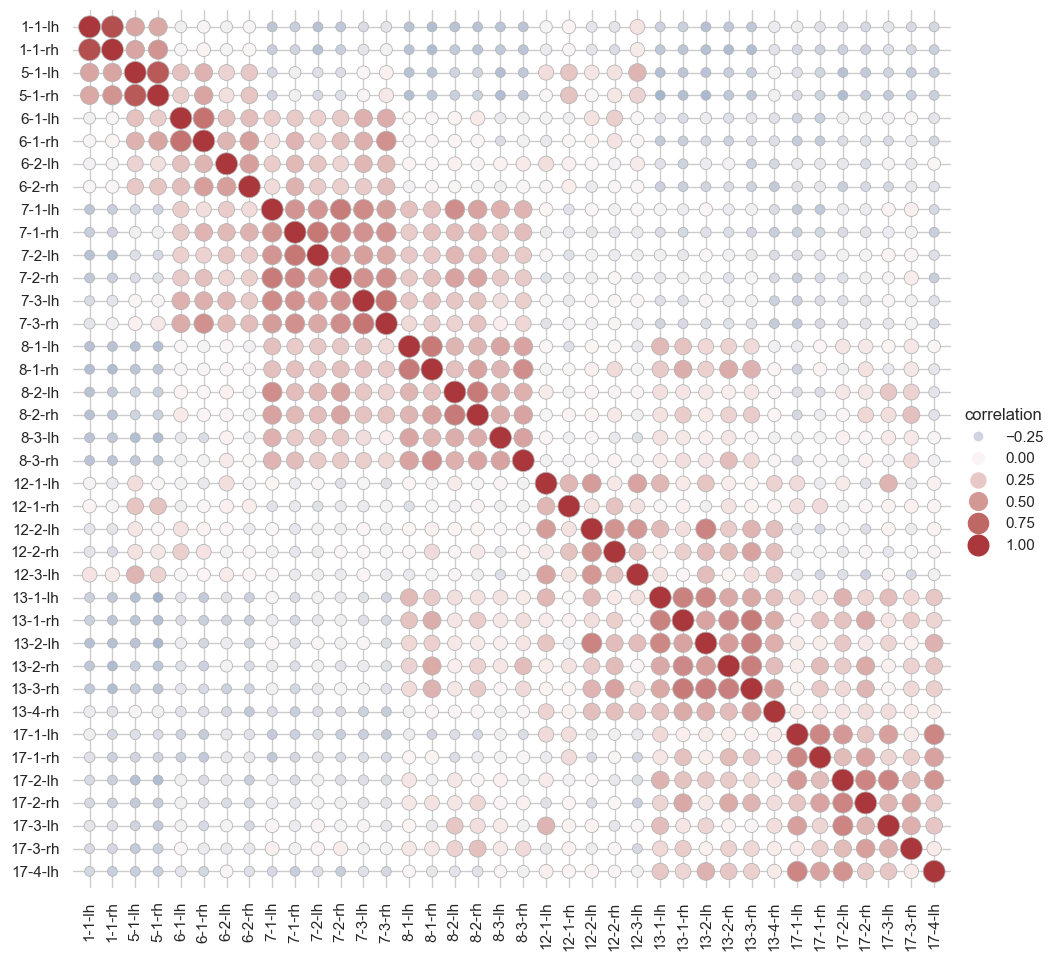

In [14]:
sns.set_theme(style="whitegrid")

# # 加载大脑网络数据集（多级列索引）
# Load the brain networks dataset, select subset, and collapse the multi-index
df = pd.read_csv("seaborn-data/brain_networks.csv", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17] # 筛选特定网络ID
# 选择列名中"network"级别值在used_networks中的列
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

# 将多级列名合并为单级（用"-"连接）
df.columns = df.columns.map("-".join)

# 计算相关性矩阵并转换长格式
# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")
display(corr_mat.sample(10))

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", 
    hue="correlation", size="correlation", # 颜色和大小均表示相关性
    palette="vlag", hue_norm=(-1, 1),      # 颜色映射范围-1到1
    edgecolor=".7",                        # 点边缘颜色（灰色）
    height=10, sizes=(50, 250),            # 图形高度和点大小范围
    size_norm=(-.2, .8),                   # 大小映射范围调整
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal") # 移除轴标签，强制1:1比例
g.despine(left=True, bottom=True)           # 移除顶部和右侧的坐标轴线
g.ax.margins(.02)                           # 添加2%的边距

# 旋转x轴标签90度避免重叠
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

这段代码使用了 Python 的 Seaborn 库（基于 Matplotlib 的高级可视化库）来创建一个关系图（relplot），展示行星数据集中的几个变量之间的关系。

,method,number,orbital_period,mass,distance,year
316,Radial Velocity,1,963.000000,2.540,43.03,2004
225,Radial Velocity,1,1313.000000,0.630,56.34,2010
298,Radial Velocity,3,843.600000,0.624,33.24,2005
621,Radial Velocity,1,2443.000000,2.540,54.92,2009
410,Radial Velocity,1,4.113775,0.450,28.98,2006
34,Imaging,1,NaN,NaN,145.00,2013
189,Transit,1,3.543870,NaN,642.00,2012
666,Transit,6,22.684500,NaN,613.00,2010
412,Radial Velocity,2,520.000000,2.600,164.20,2008
730,Transit,3,0.453285,NaN,38.70,2011


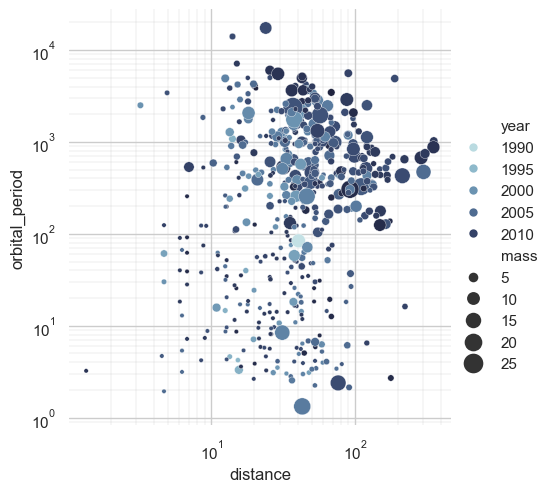

In [17]:
sns.set_theme(style="whitegrid")

# 从 Seaborn 的内置数据集加载“planets”数据。
# 这是一个天文数据集，包含系外行星的发现年份（year）、轨道周期（orbital_period）、与地球的距离（distance）、质量（mass）等字段。
planets = pd.read_csv("seaborn-data/planets.csv")
display(planets.sample(10))

# 生成一个渐变色板（colormap），用于后续的色调映射。
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
# 将 x 轴和 y 轴的刻度设置为对数尺度（log scale）。
# 因为行星的距离和轨道周期可能跨越多个数量级，对数刻度可以更好地展示数据分布。
g.set(xscale="log", yscale="log")
# 在 x 轴和 y 轴上添加次要网格线（minor grid）
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
# 移除左侧和底部的边框线（spines），让图表更简洁
g.despine(left=True, bottom=True)

这段代码使用 seaborn 库创建了一个多面板的时间序列图，展示航班乘客数据的变化。

,year,month,passengers
83,1955,December,278
35,1951,December,166
66,1954,July,302
138,1960,July,622
109,1958,February,318
48,1953,January,196
30,1951,July,199
24,1951,January,145
91,1956,August,405
121,1959,February,342


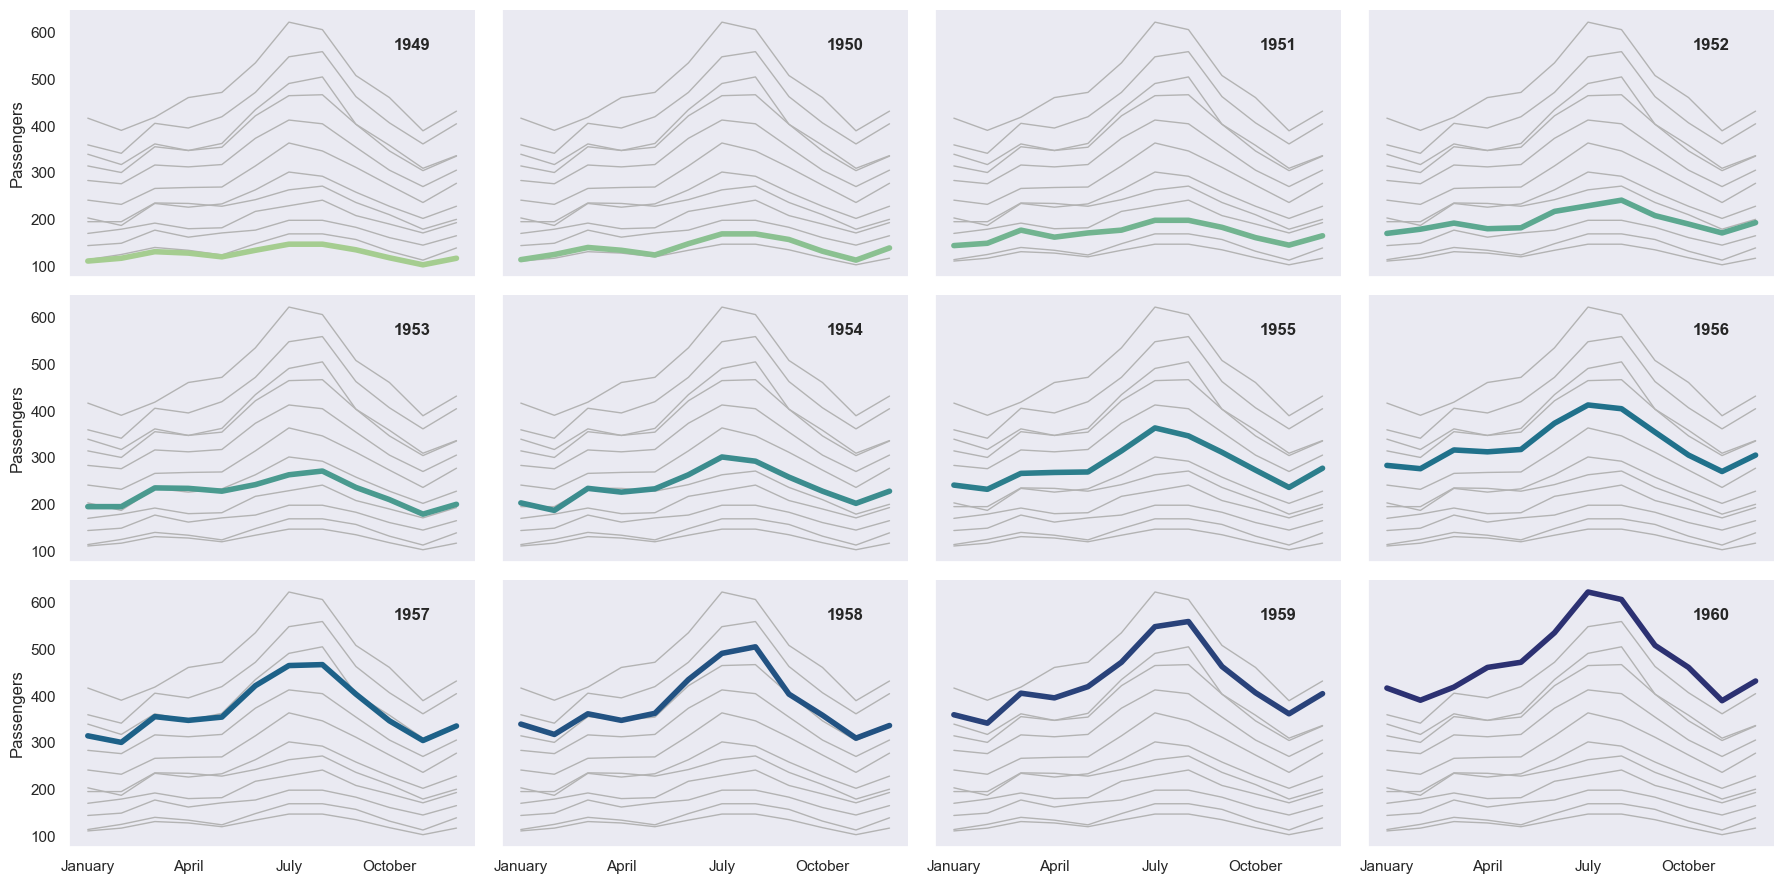

In [52]:
sns.set_theme(style="dark")
# 加载 seaborn 内置的 flights 数据集，该数据集包含 1949-1960 年每月航班乘客数量的记录，列包括 year、month 和 passengers。
flights = pd.read_csv("seaborn-data/flights.csv")
display(flights.sample(10))

# Plot each year's time series in its own facet
g = sns.relplot(
    data=flights,
    x="month", y="passengers", col="year", hue="year",
    kind="line",
    palette="crest",        # 使用 "crest" 颜色渐变（蓝绿色系）
    linewidth=4, zorder=5,
    col_wrap=4,
    height=3, aspect=1.5,   # 每个子图的高度为 2 英寸，宽高比为 1.5
    legend=False,           # 关闭默认图例（因为分面已通过标题和颜色区分年份）
    )

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():    # g.axes_dict：是一个字典，键为年份，值为对应的子图对象（ax）。

    # Add the title as an annotation within the plot
    # ax.text：在每个子图的坐标 (0.8, 0.85) 处（相对坐标，范围 0-1）添加年份文本，字体加粗。
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")   # 使用子图的相对坐标系

    # Plot every year's time series in the background
    # 添加背景折线（所有年份的浅色线）
    # 效果：每个子图的背景会显示所有年份的乘客变化（浅灰色线），突出当前年份的折线（彩色粗线），便于对比。
    sns.lineplot(
        data=flights, x="month", y="passengers",
        units="year",   # 将每年的数据视为独立单元（不聚合）
        estimator=None, # 禁用默认的统计聚合（直接绘制原始数据）
        color=".7",     # 使用浅灰色（灰度值 0.7）绘制线条
        linewidth=1,    # 设置线条宽度为 1（比主折线细）
        ax=ax           # 指定绘制到当前子图
        )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::3])

# Tweak the supporting aspects of the plot
g.set_titles("")    # 清空子图的默认标题（原本会显示 year=1949 等）
g.set_axis_labels("", "Passengers")
g.tight_layout()    # 自动调整子图间距，防止重叠。